<a href="https://colab.research.google.com/github/shivamsouravjha/Web-D-trials/blob/master/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
from tensorflow import keras
import cv2
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.models import load_model
import math
import numpy as np
import pathlib
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
from keras.models import Sequential # to create a cnn model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam
from keras.applications import xception
from keras.layers import LeakyReLU


In [221]:
def boxx(a ,k,n,s):
  x1 = Conv2D(n, (k,k),strides=(s,s), padding='same')(a)
  x1 = LeakyReLU()(x1)
  return x1, x1

In [222]:
def boxy(a,b,k,n):
  x1 = Conv2D(n, (k ,k),strides=(1,1), padding='same')(a)
  x1 = LeakyReLU()(x1)
  x1 = Conv2D(n, (k ,k),strides=(1,1), padding='same')(x1)

  return x1+b,x1+b



In [223]:
input_img = Input(shape=(64,64,1))
inputs= input_img 


In [224]:
a0,b0  = boxx(input_img,7,32,1)  #block 1

In [225]:
a1 = boxx(a0,3,32,2)[0]            #block 2(a)
a2,b2 = boxx(a1,3,64,1)             #block 2(B)

In [226]:
a3 = boxx(a2,3,64,2)[0]            #block 3(a)
a4,b4 = boxx(a3,3,128,1)             #block 3(B)

In [227]:
a5,b5 = boxy(a4,a4,3,128)          #block 4

In [228]:
a6,b6 = boxy(a5,a5,3,128)          #block 5

In [229]:
 a7,b7 = boxy(a6,a6,3,128)          #block 6

In [230]:
 a8,b8 = boxy(a7,a7,3,128)          #block 7

In [231]:
a9 =boxx(a8,3,64,1)[0]            #block 8


In [232]:
a10 = tf.compat.v1.image.resize_bilinear(a9, (tf.shape(a9)[1]*2, tf.shape(a9)[2]*2))

In [233]:
a11 = Add()([a10,b2])

In [234]:
a11 = boxx(a11,3,64,1)[0]
a12 = boxx(a11,3,32,1)[0]


In [235]:
a13 = tf.compat.v1.image.resize_bilinear(a12, (tf.shape(a12)[1]*2, tf.shape(a12)[2]*2))

In [236]:
a14 = Add()([a13,b0])

In [237]:
a15 = Conv2D(32, (3 ,3),strides=(1,1), padding='same')(a14)
a16 = LeakyReLU()(a15)
a17 = Conv2D(3, (7 ,7),strides=(1,1), padding='same')(a16)

In [238]:
autoencoder =Model(input_img,a16)

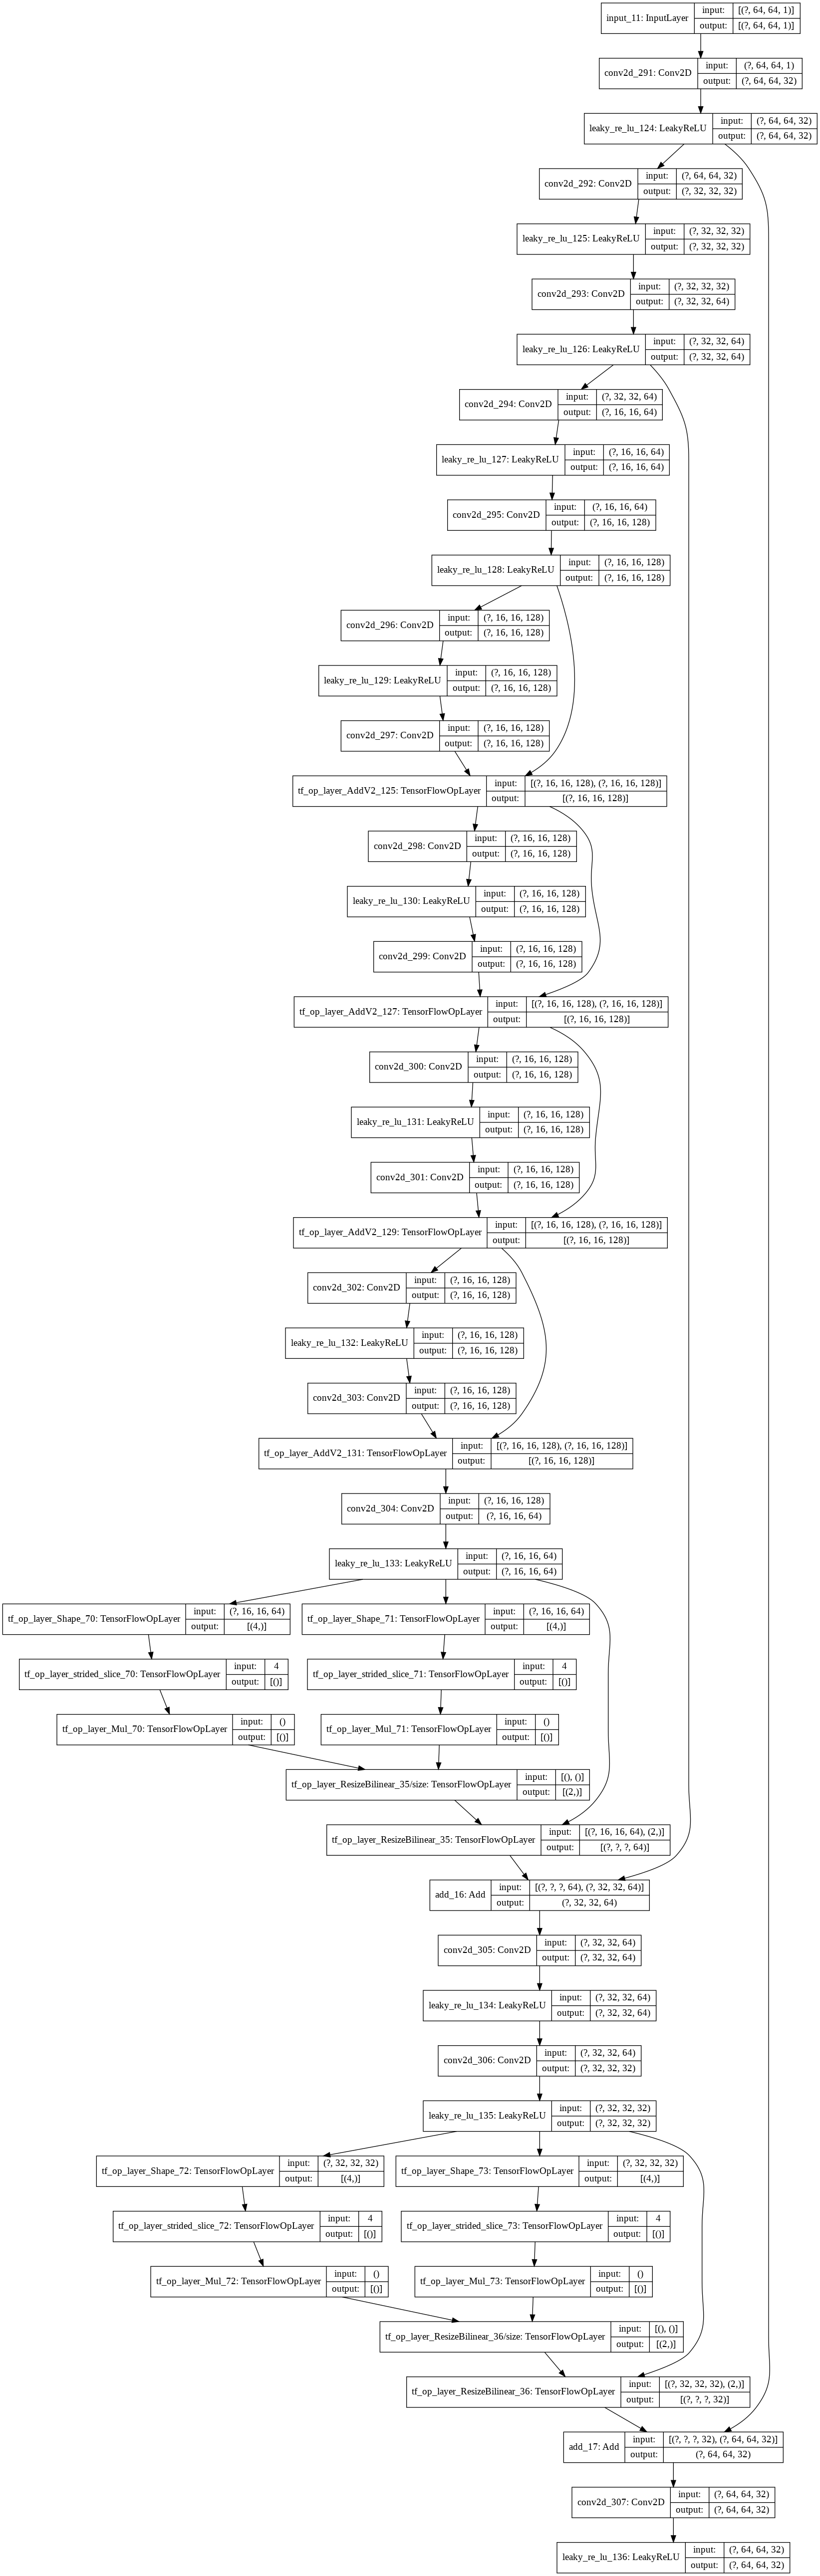

In [239]:

from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")